In [59]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as sm
import numpy as np
import pandas as pd

In [60]:
iris = datasets.load_iris()

x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

y= pd.DataFrame(iris.target)
y.columns = ['Targets']




In [61]:
x

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [62]:
y



,Targets
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


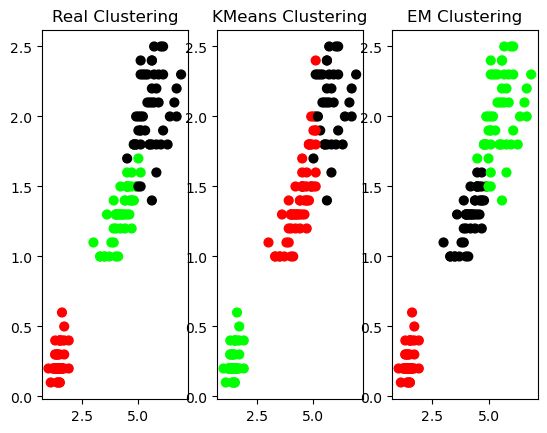

In [67]:
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1,3,1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clustering')

model1 = KMeans(n_clusters=3)
model1.fit(x)

plt.subplot(1,3,2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model1.labels_], s=40)
plt.title('KMeans Clustering')
model2 = GaussianMixture(n_components=3)
model2.fit(x)

plt.subplot(1,3,3)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model2.predict(x)], s=40)
plt.title('EM Clustering')
plt.show()

In [71]:
print("Real Target : ", iris.target)

Real Data :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [72]:
print("K-Means : ", model1.labels_)

K-Means :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [73]:
print("EM : ", model2.predict(x))

EM :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [78]:
print("Accuracy Score of K-Means with respect to Real clustreing  => ", sm.accuracy_score(y, model1.labels_ ) )

Accuracy Score of K-Means with respect to Real clustreing  =>  0.24


In [80]:
print("Accuracy Score of EM Algo with respect to Real clustreing  => ", sm.accuracy_score(y, model2.predict(x) ) )

Accuracy Score of EM Algo with respect to Real clustreing  =>  0.36666666666666664


In [81]:
km = sm.accuracy_score(y, model1.labels_ )
em = sm.accuracy_score(y, model2.predict(x))

if km > em:
    print("K-Means have better Clustering Capability")    
else: 
    print("EM have better Clustering Capability") 

EM have better Clustering Capability
